In [43]:
# !pip install pandas numpy scikit-learn matplotlib seaborn joblib


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [45]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("prevek18/ames-housing-dataset")

print("Path to dataset files:", path)


# Build full path to the CSV file
dataset_file = os.path.join(path, 'AmesHousing.csv')

# Load dataset
df = pd.read_csv(dataset_file)

# Preview dataset
print("Dataset Shape:", df.shape)
print(df.head())
print(df.info())


Path to dataset files: C:\Users\ANKIT SARKAR\.cache\kagglehub\datasets\prevek18\ames-housing-dataset\versions\1
Dataset Shape: (2930, 82)
   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       

Dataset Shape: (2930, 82)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   o

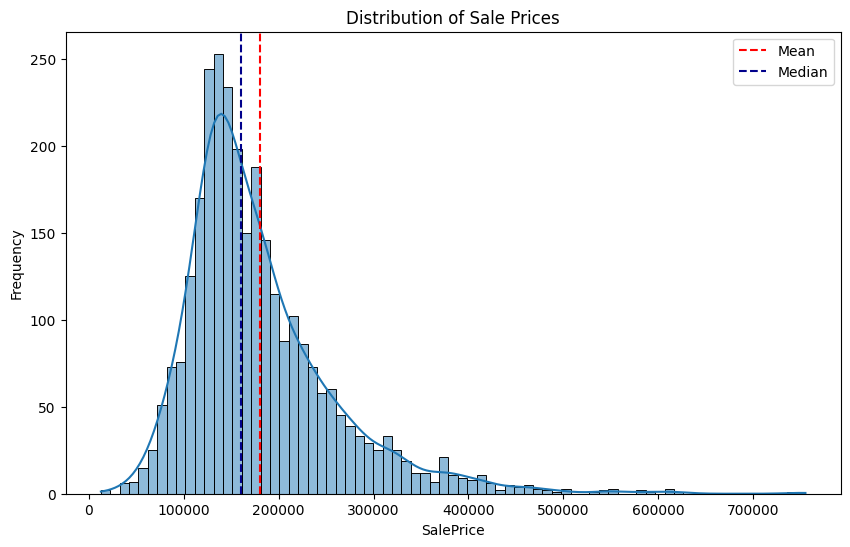

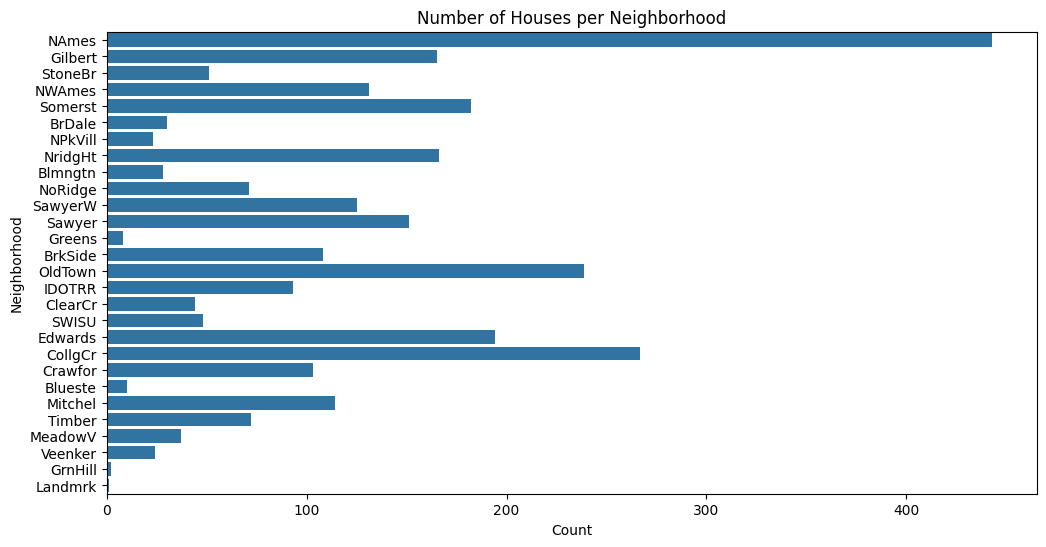

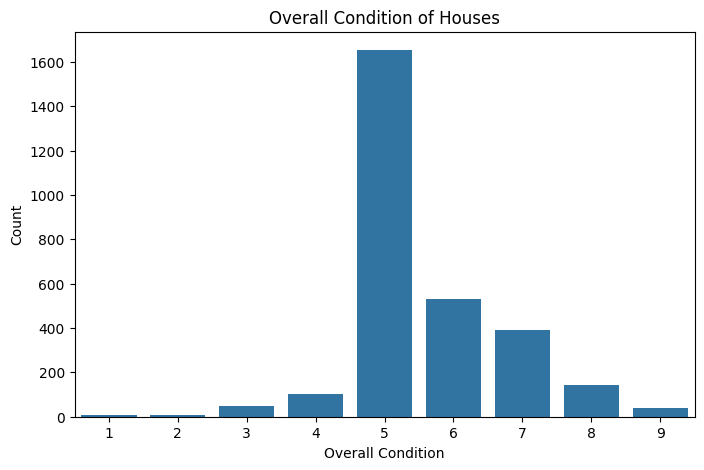

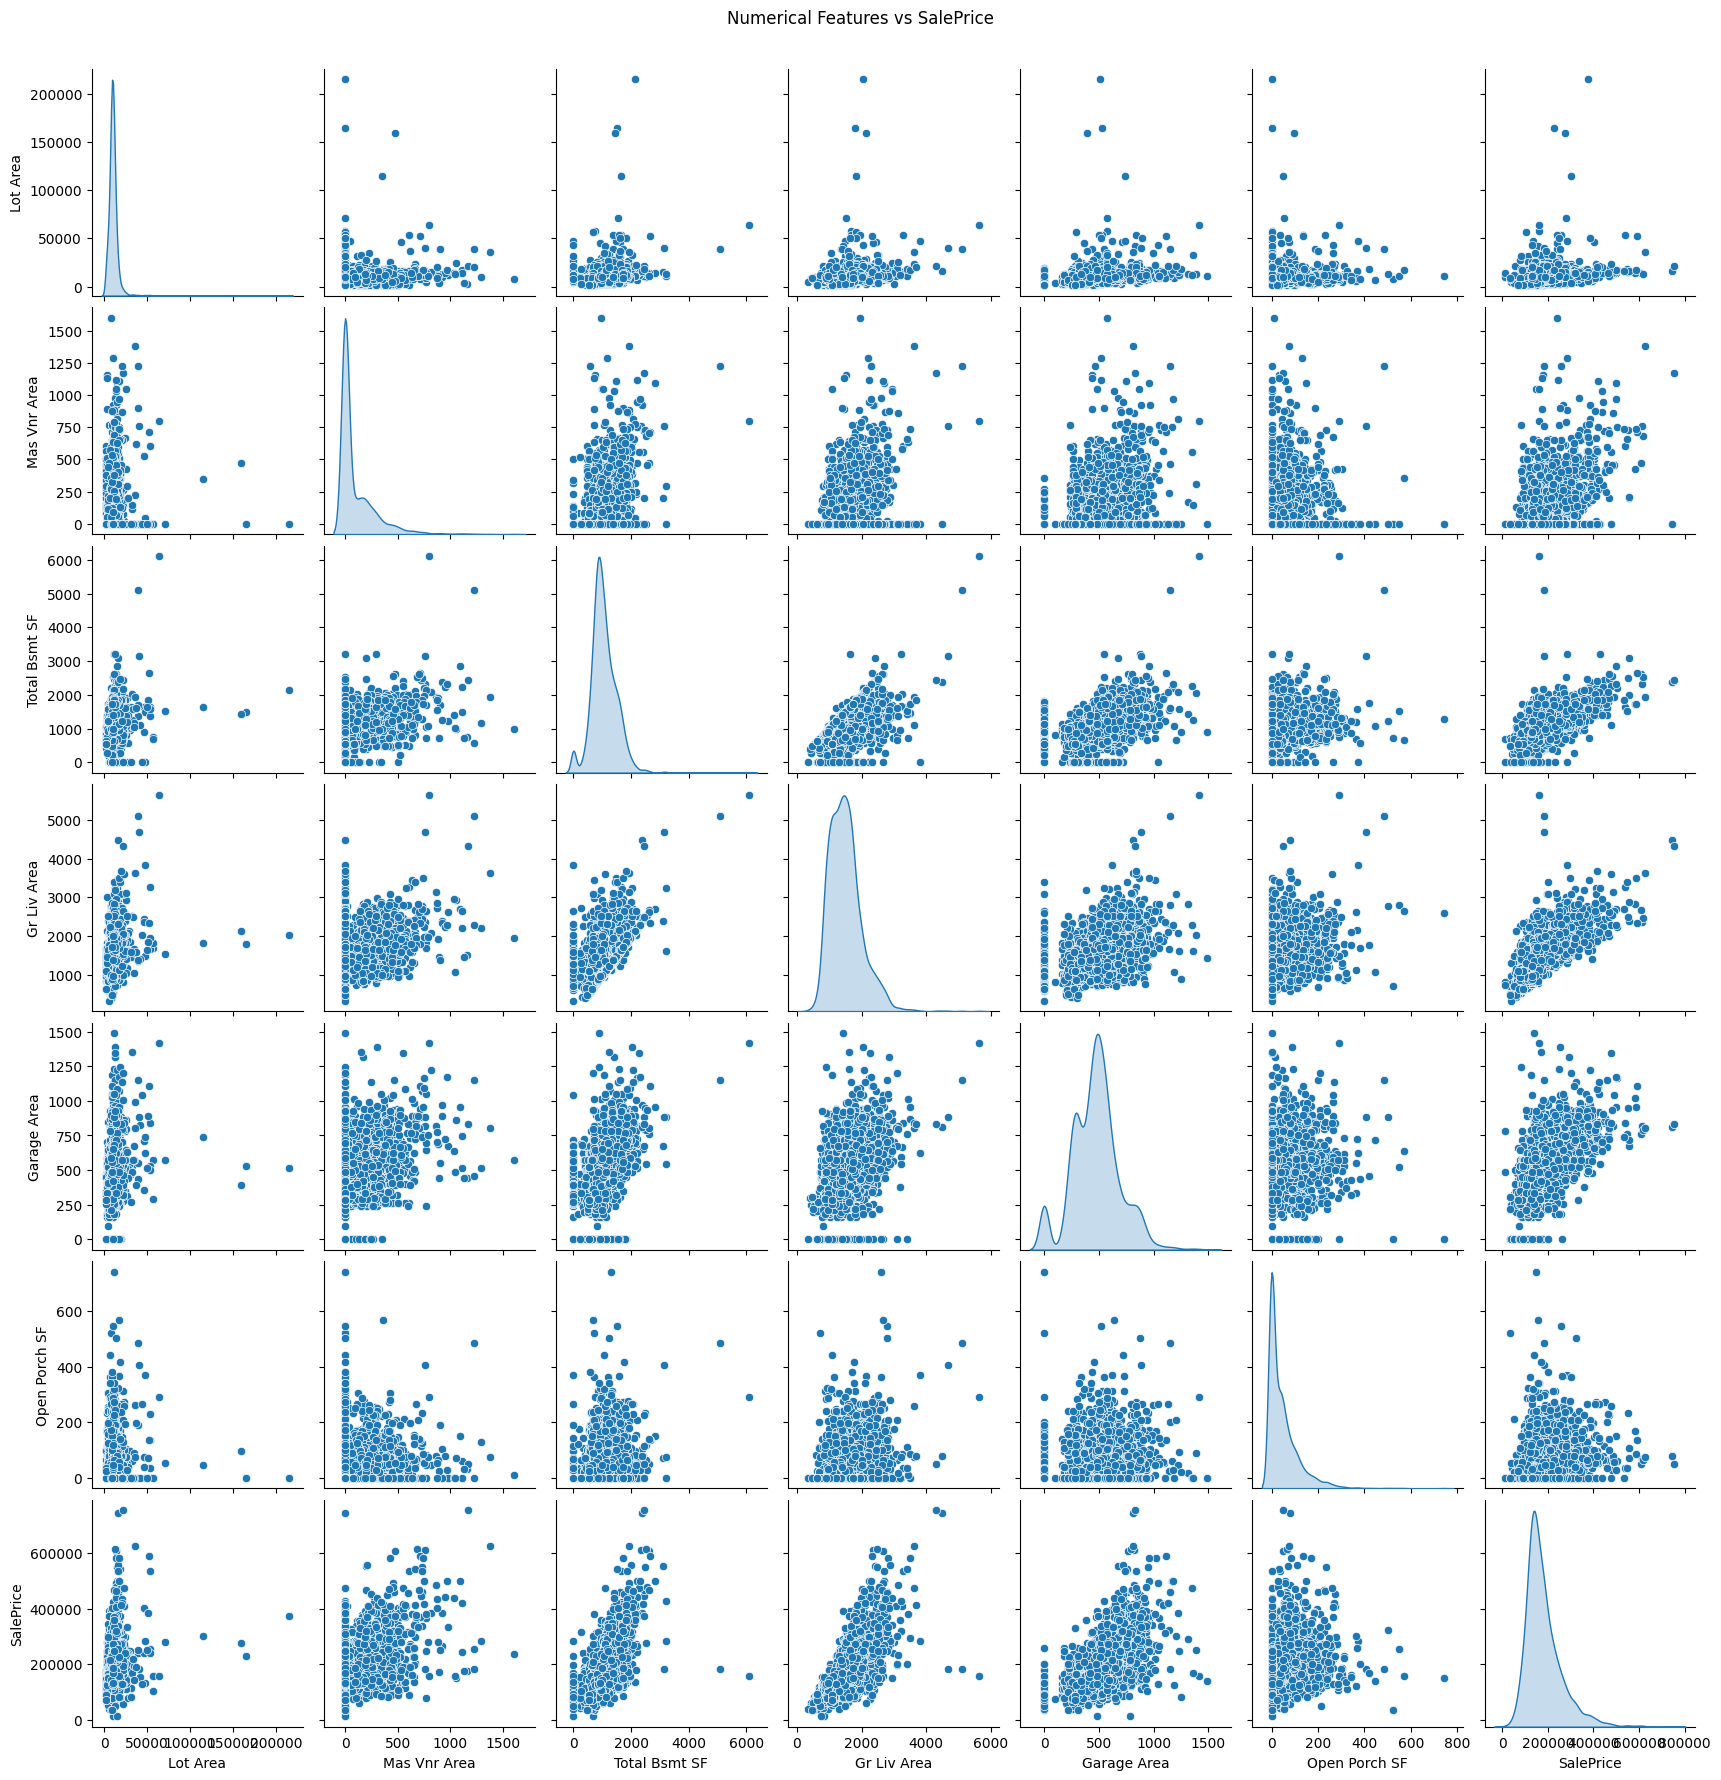

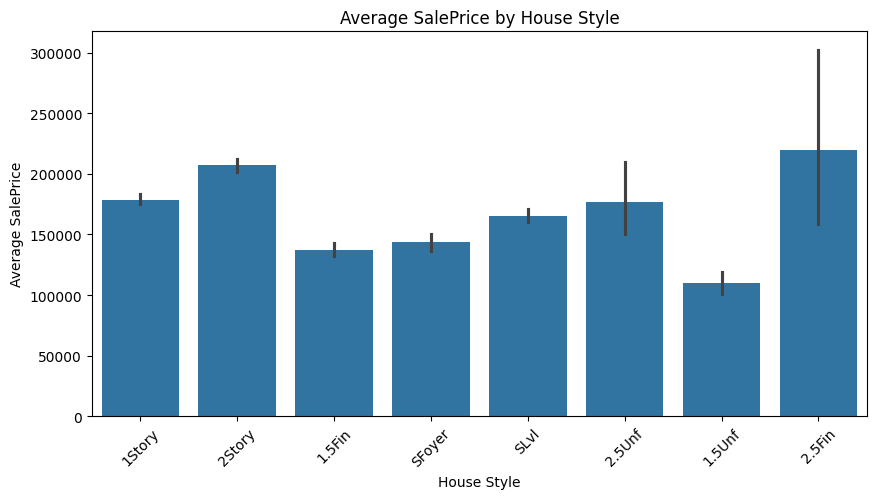

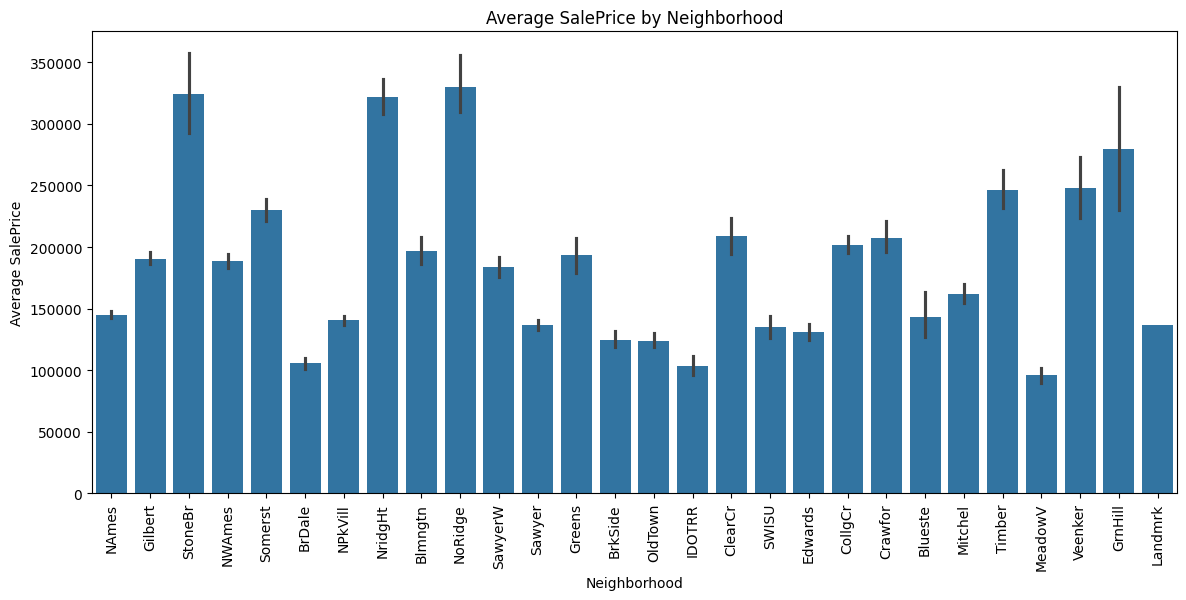

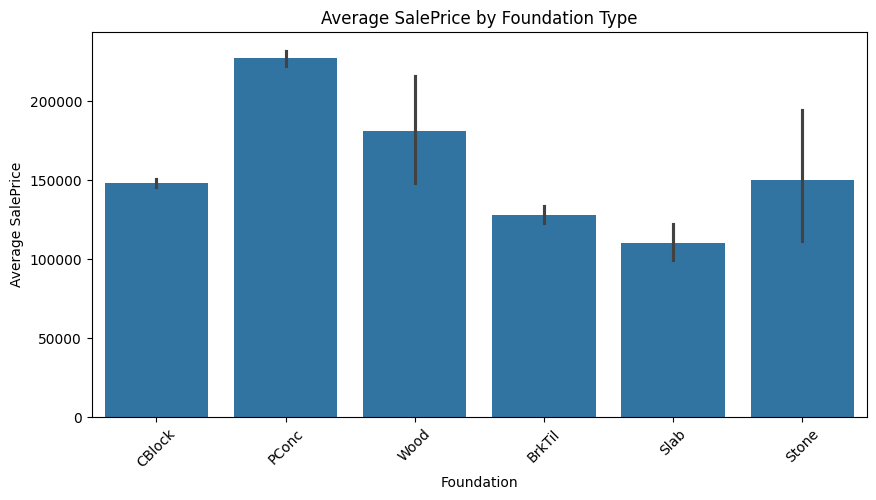

In [46]:
# Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

print("Dataset Shape:", df.shape)
print(df.info())

# Target Feature Analysis: SalePrice
print(f"\nMean SalePrice: {round(df['SalePrice'].mean())}")
print(f"Median SalePrice: {df['SalePrice'].median()}")
print(f"Max SalePrice: {df['SalePrice'].max()}")
print(f"Min SalePrice: {df['SalePrice'].min()}")

plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], bins=75, kde=True)
plt.axvline(df['SalePrice'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['SalePrice'].median(), color='darkblue', linestyle='--', label='Median')
plt.title('Distribution of Sale Prices')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Neighborhood distribution
plt.figure(figsize=(12, 6))
sns.countplot(y='Neighborhood', data=df)
plt.title('Number of Houses per Neighborhood')
plt.xlabel('Count')
plt.ylabel('Neighborhood')
plt.show()

# Overall Condition distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Overall Cond', data=df)
plt.title('Overall Condition of Houses')
plt.xlabel('Overall Condition')
plt.ylabel('Count')
plt.show()

# Numerical Features vs SalePrice correlation
num_features = ['Lot Area', 'Mas Vnr Area', 'Total Bsmt SF', 'Gr Liv Area', 'Garage Area', 'Open Porch SF', 'SalePrice']
sns.pairplot(df[num_features], diag_kind='kde')
plt.suptitle('Numerical Features vs SalePrice', y=1.02)
plt.show()

# Categorical Feature: House Style vs SalePrice
plt.figure(figsize=(10, 5))
sns.barplot(x='House Style', y='SalePrice', data=df, estimator=lambda x: sum(x) / len(x))
plt.xticks(rotation=45)
plt.title('Average SalePrice by House Style')
plt.xlabel('House Style')
plt.ylabel('Average SalePrice')
plt.show()

# Neighborhood vs SalePrice
plt.figure(figsize=(14, 6))
sns.barplot(x='Neighborhood', y='SalePrice', data=df, estimator=lambda x: sum(x) / len(x))
plt.xticks(rotation=90)
plt.title('Average SalePrice by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average SalePrice')
plt.show()

# Foundation type vs SalePrice
plt.figure(figsize=(10, 5))
sns.barplot(x='Foundation', y='SalePrice', data=df, estimator=lambda x: sum(x) / len(x))
plt.xticks(rotation=45)
plt.title('Average SalePrice by Foundation Type')
plt.xlabel('Foundation')
plt.ylabel('Average SalePrice')
plt.show()


💾 Preprocessor saved as 'preprocessor.joblib'

Data Preprocessing Completed.
Processed features shape: (2930, 303)


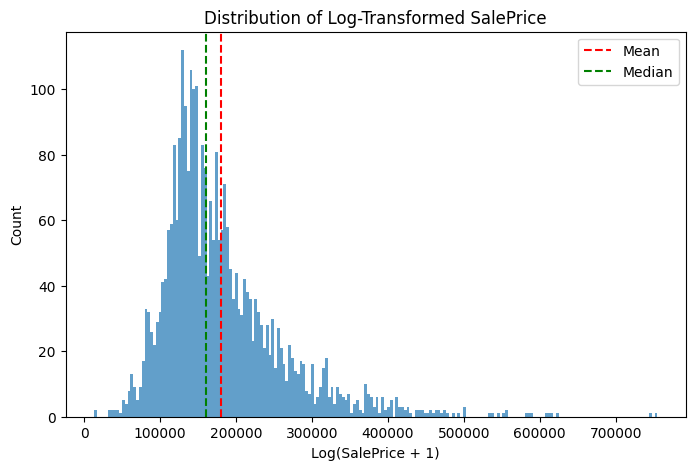

In [47]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt

# 1️⃣ Keep SalePrice
df['SalePrice'] 

# 2️⃣ Separate features and target
X = df.drop(['Order', 'PID', 'SalePrice'], axis=1)
y = df['SalePrice']

# 3️⃣ Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# 4️⃣ Build Preprocessing Pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# 5️⃣ Apply Preprocessing
X_processed = preprocessor.fit_transform(X)

# Save the fitted preprocessor for future predictions
import joblib
joblib.dump(preprocessor, 'preprocessor.joblib')
print("💾 Preprocessor saved as 'preprocessor.joblib'")


print("\nData Preprocessing Completed.")
print(f"Processed features shape: {X_processed.shape}")

# 6️⃣ Visualize SalePrice distribution after log transformation
plt.figure(figsize=(8, 5))
plt.hist(y, bins=200, alpha=0.7)
plt.axvline(x=np.mean(y), color='red', linestyle='dashed', label='Mean')
plt.axvline(x=np.median(y), color='green', linestyle='dashed', label='Median')
plt.title('Distribution of Log-Transformed SalePrice')
plt.xlabel('Log(SalePrice + 1)')
plt.ylabel('Count')
plt.legend()
plt.show()


In [48]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

print("\n📊 Calculating Top 10 Important Features...")

# Fit Linear Regression model for feature importance analysis
linreg = LinearRegression()
linreg.fit(X_processed, y)

# Extract feature names after preprocessing
# For numerical features
num_features = numerical_cols

# For categorical features after one-hot encoding
cat_features = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols).tolist()

# Combine feature names
all_features = num_features + cat_features

# Create DataFrame of feature importance
feature_importance = pd.DataFrame({
    'Feature': all_features,
    'Coefficient': linreg.coef_
})
feature_importance['Importance'] = feature_importance['Coefficient'].abs()

# Sort and display top 10 important features
top_features = feature_importance.sort_values(by='Importance', ascending=False).head(10)

print("\n🔟 Top 10 Features influencing SalePrice:")
print(top_features[['Feature', 'Coefficient']])



📊 Calculating Top 10 Important Features...

🔟 Top 10 Features influencing SalePrice:
                  Feature    Coefficient
130     Roof Matl_ClyTile -565830.344427
282     Misc Feature_Elev -421699.238882
284     Misc Feature_Othr  127104.722878
132     Roof Matl_Membran  120940.001973
137     Roof Matl_WdShngl  112633.118951
107      Condition 2_PosN -107675.865965
285     Misc Feature_Shed  106763.629476
283     Misc Feature_Gar2  105958.852203
76   Neighborhood_GrnHill  105851.526298
133       Roof Matl_Metal  104163.012330



🔧 Starting Ridge Regression Hyperparameter Tuning...


🏅 Best Ridge Alpha Found: 10
🔄 Cross-Validation R² Scores: [0.82972722 0.87443196 0.87092639 0.85899889 0.90044175]
📊 Average CV R² Score: 0.8669

✅ Tuned Ridge Final Test R²: 0.9212
✅ Tuned Ridge Final Test RMSE: 0.0006

💾 Best tuned Ridge model saved as 'best_tuned_ridge_model.joblib'


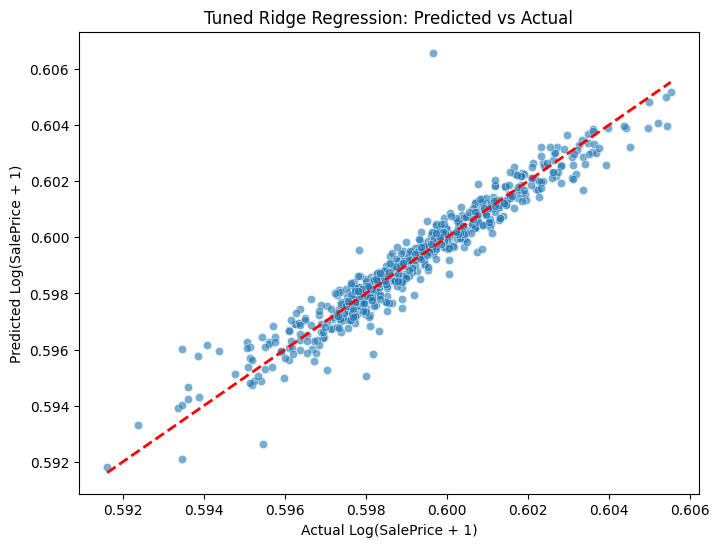

In [49]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import joblib

print("\n🔧 Starting Ridge Regression Hyperparameter Tuning...")

# Grid of alpha values to tune
param_grid = {'alpha': [0.01, 0.1, 1.0, 10, 100]}

grid_search = GridSearchCV(Ridge(random_state=42), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best Ridge Model
best_ridge = grid_search.best_estimator_
print(f"🏅 Best Ridge Alpha Found: {grid_search.best_params_['alpha']}")

# Cross-Validation R² Scores
cv_scores = cross_val_score(best_ridge, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)
print(f"🔄 Cross-Validation R² Scores: {cv_scores}")
print(f"📊 Average CV R² Score: {cv_scores.mean():.4f}")

# Evaluate on Test Set
y_test_pred = best_ridge.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"\n✅ Tuned Ridge Final Test R²: {test_r2:.4f}")
print(f"✅ Tuned Ridge Final Test RMSE: {test_rmse:.4f}")

# Save the tuned Ridge model
joblib.dump(best_ridge, 'best_tuned_ridge_model.joblib')
print("\n💾 Best tuned Ridge model saved as 'best_tuned_ridge_model.joblib'")

# Plot Predicted vs Actual SalePrice
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Log(SalePrice + 1)')
plt.ylabel('Predicted Log(SalePrice + 1)')
plt.title('Tuned Ridge Regression: Predicted vs Actual')
plt.show()



🚀 Training Tuned Ridge Regression...
✅ Tuned Ridge Regression Train MSE: 0.000000, RMSE: 0.000631, R²: 0.9101
✅ Tuned Ridge Regression Test MSE: 0.000000, RMSE: 0.000625, R²: 0.9212


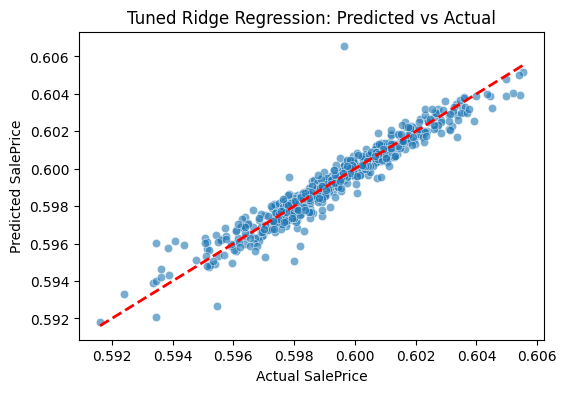


🚀 Training Linear Regression...
✅ Linear Regression Train MSE: 0.000000, RMSE: 0.000548, R²: 0.9322
✅ Linear Regression Test MSE: 0.000001, RMSE: 0.000787, R²: 0.8751


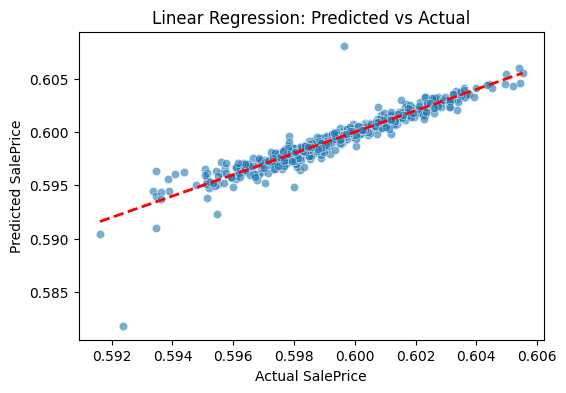


🚀 Training Lasso Regression...
✅ Lasso Regression Train MSE: 0.000002, RMSE: 0.001580, R²: 0.4361
✅ Lasso Regression Test MSE: 0.000003, RMSE: 0.001635, R²: 0.4604


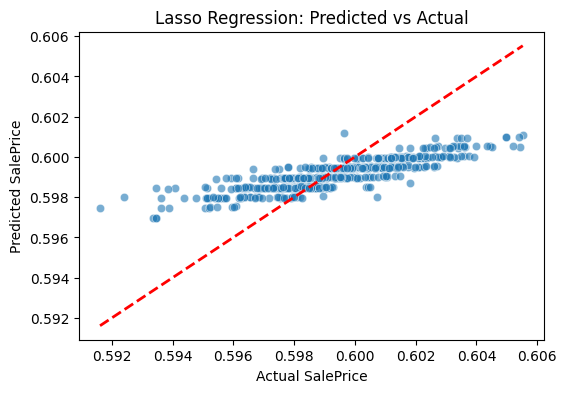


🚀 Training ElasticNet...
✅ ElasticNet Train MSE: 0.000001, RMSE: 0.001167, R²: 0.6924
✅ ElasticNet Test MSE: 0.000001, RMSE: 0.001137, R²: 0.7391


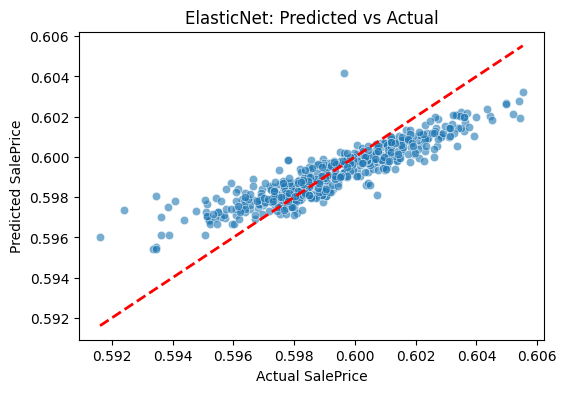


🚀 Training Decision Tree Regressor...
✅ Decision Tree Regressor Train MSE: 0.000000, RMSE: 0.000000, R²: 1.0000
✅ Decision Tree Regressor Test MSE: 0.000001, RMSE: 0.001005, R²: 0.7964


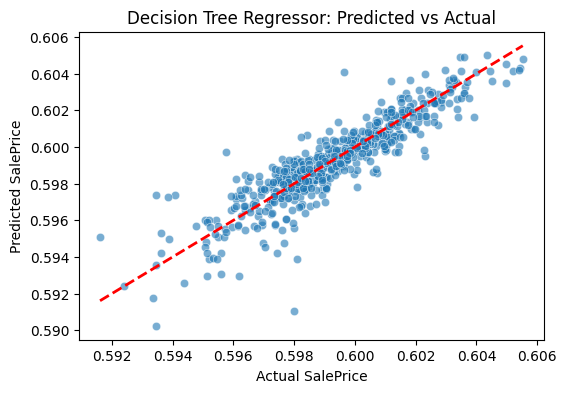


🚀 Training Random Forest Regressor...
✅ Random Forest Regressor Train MSE: 0.000000, RMSE: 0.000292, R²: 0.9808
✅ Random Forest Regressor Test MSE: 0.000000, RMSE: 0.000646, R²: 0.9157


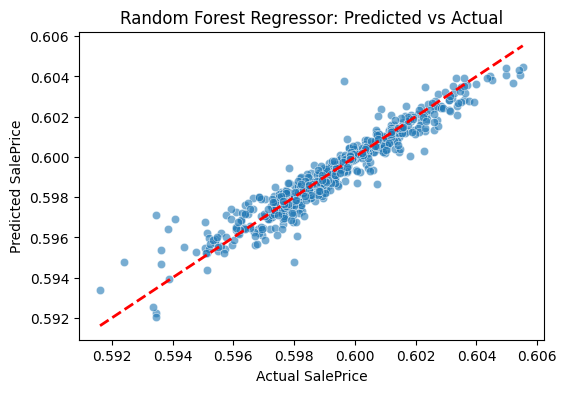


📊 Final Model Comparison Results:
                     Model     Train MSE  Train RMSE  Train R²      Test MSE  \
0   Tuned Ridge Regression  3.981178e-07    0.000631  0.910078  3.906709e-07   
1  Random Forest Regressor  8.498834e-08    0.000292  0.980804  4.177237e-07   
2        Linear Regression  3.001094e-07    0.000548  0.932215  6.192145e-07   
3  Decision Tree Regressor  0.000000e+00    0.000000  1.000000  1.009303e-06   
4               ElasticNet  1.361844e-06    0.001167  0.692405  1.293138e-06   
5         Lasso Regression  2.496556e-06    0.001580  0.436111  2.674373e-06   

   Test RMSE   Test R²  
0   0.000625  0.921173  
1   0.000646  0.915715  
2   0.000787  0.875060  
3   0.001005  0.796350  
4   0.001137  0.739080  
5   0.001635  0.460385  

🏆 Best Final Model: Tuned Ridge Regression

💾 Best model saved as 'final_best_model.joblib'


In [50]:
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Use the tuned Ridge as part of the models
models = {
    'Tuned Ridge Regression': best_ridge,
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(alpha=0.001, random_state=42),
    'ElasticNet': ElasticNet(alpha=0.001, l1_ratio=0.5, random_state=42),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42, n_jobs=-1)
}

results = []

for model_name, model in models.items():
    print(f"\n🚀 Training {model_name}...")
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # ✅ Print formatted metrics
    print(f"✅ {model_name} Train MSE: {train_mse:.6f}, RMSE: {train_rmse:.6f}, R²: {train_r2:.4f}")
    print(f"✅ {model_name} Test MSE: {test_mse:.6f}, RMSE: {test_rmse:.6f}, R²: {test_r2:.4f}")
    
    results.append({
        'Model': model_name,
        'Train MSE': train_mse,
        'Train RMSE': train_rmse,
        'Train R²': train_r2,
        'Test MSE': test_mse,
        'Test RMSE': test_rmse,
        'Test R²': test_r2,
        'Trained Model': model
    })
    
    # Plot Predicted vs Actual SalePrice
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
    plt.xlabel('Actual SalePrice')        # ✅ Updated
    plt.ylabel('Predicted SalePrice')     # ✅ Updated
    plt.title(f'{model_name}: Predicted vs Actual')
    plt.show()


# Results DataFrame
results_df = pd.DataFrame(results).sort_values(by='Test R²', ascending=False).reset_index(drop=True)
print("\n📊 Final Model Comparison Results:")
print(results_df[['Model', 'Train MSE', 'Train RMSE', 'Train R²', 'Test MSE', 'Test RMSE', 'Test R²']])

# Best Final Model
best_model = results_df.loc[0, 'Trained Model']
best_model_name = results_df.loc[0, 'Model']
print(f"\n🏆 Best Final Model: {best_model_name}")

# Save the best model
joblib.dump(best_model, 'final_best_model.joblib')
print("\n💾 Best model saved as 'final_best_model.joblib'")

# Feature Importance Plot (if tree-based)
if best_model_name in ['Random Forest Regressor', 'Decision Tree Regressor']:
    importances = best_model.feature_importances_
    feature_names = [f'Feature {i}' for i in range(len(importances))]  # Placeholder names
    
    feat_imp_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False).head(10)
    
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='Blues_r')
    plt.title(f'Top 10 Feature Importances - {best_model_name}')
    plt.show()
